In [43]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [44]:
# Functions
def orb_detector_descriptor(image):
    """
    Applies the ORB (Oriented FAST and Rotated BRIEF) feature detector and descriptor to an input image.

    :param image: Input image.
    :type image: numpy.ndarray
    :return: Keypoints and descriptors.
    :rtype: tuple(numpy.ndarray, numpy.ndarray)
    """
    # Create the ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints
    keypoints, descriptors = orb.detectAndCompute(image, None)

    return keypoints, descriptors

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

K = np.array([
    [4085.11, 0, 3000],
    [0, 4102.56, 2000],
    [0, 0, 1]
])

In [45]:
#Image initialisations

ip1 = input("Enter the path to the image1: ")
ip2 = input("Enter the path to the image2: ")
ip3 = input("Enter the path to the image3: ")
ip4 = input("Enter the path to the image4: ")

Enter the path to the image1:  D:\Documents\ss\temp\David\Dawsonville\Dawsonville\Dville2-RESEPI-6C63DB-2024-08-05-20-09-01\camera\00000000000000003282760103046178_1406924035961448_1406924035967508.jpg
Enter the path to the image2:  D:\Documents\ss\temp\David\Dawsonville\Dawsonville\Dville2-RESEPI-6C63DB-2024-08-05-20-09-01\camera\00000000000000003282760103046178_1406924038964091_1406924038970146.jpg
Enter the path to the image3:  D:\Documents\ss\temp\David\Dawsonville\Dawsonville\Dville2-RESEPI-6C63DB-2024-08-05-20-09-01\camera\00000000000000003282760103046178_1406924041966443_1406924041972504.jpg
Enter the path to the image4:  D:\Documents\ss\temp\David\Dawsonville\Dawsonville\Dville2-RESEPI-6C63DB-2024-08-05-20-09-01\camera\00000000000000003282760103046178_1406924044970552_1406924044976598.jpg


In [46]:
im1 = cv2.imread(ip1)
gi1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2 = cv2.imread(ip2)
gi2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
im3 = cv2.imread(ip3)
gi3 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)
im4 = cv2.imread(ip4)
gi4 = cv2.cvtColor(im4, cv2.COLOR_BGR2GRAY)

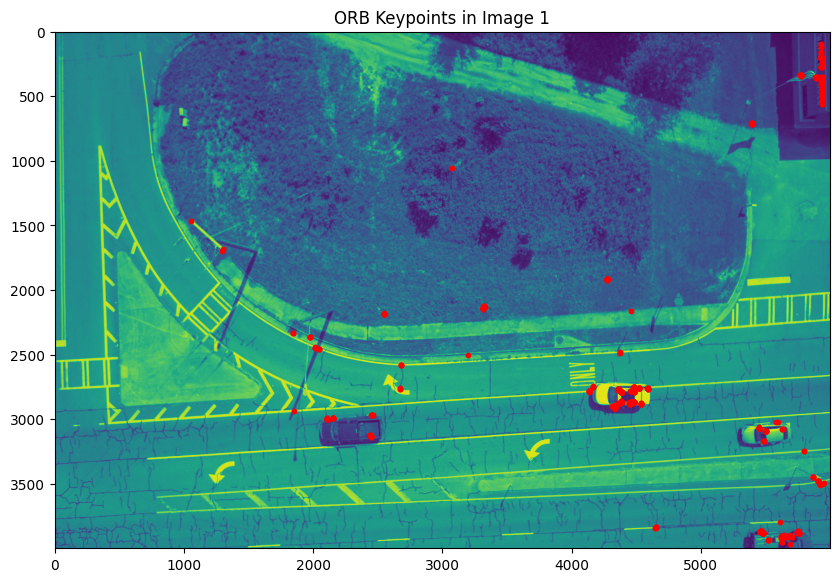

<Figure size 640x480 with 0 Axes>

In [47]:
#Keypoints and descriptors
k1,d1 = orb_detector_descriptor(gi1)
k2,d2 = orb_detector_descriptor(gi2)
k3,d3 = orb_detector_descriptor(gi3)
k4,d4 = orb_detector_descriptor(gi4)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the image and keypoints
plt.figure()
ax.imshow(gi1)
ax.scatter([kp.pt[0] for kp in k1], [kp.pt[1] for kp in k1], color='r', s=10)
ax.set_title('ORB Keypoints in Image 1')
plt.show()

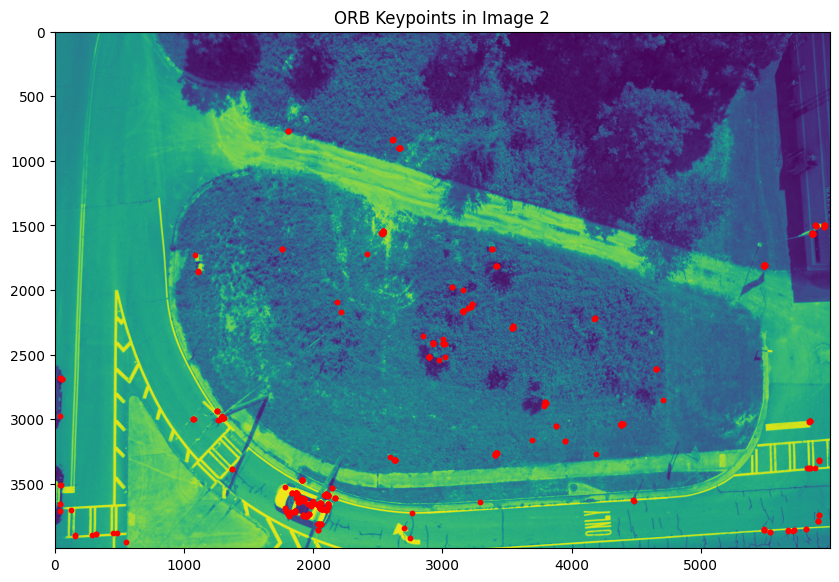

<Figure size 640x480 with 0 Axes>

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.figure()
ax.imshow(gi2)
ax.scatter([kp.pt[0] for kp in k2], [kp.pt[1] for kp in k2], color='r', s=10)
ax.set_title('ORB Keypoints in Image 2')
plt.show()

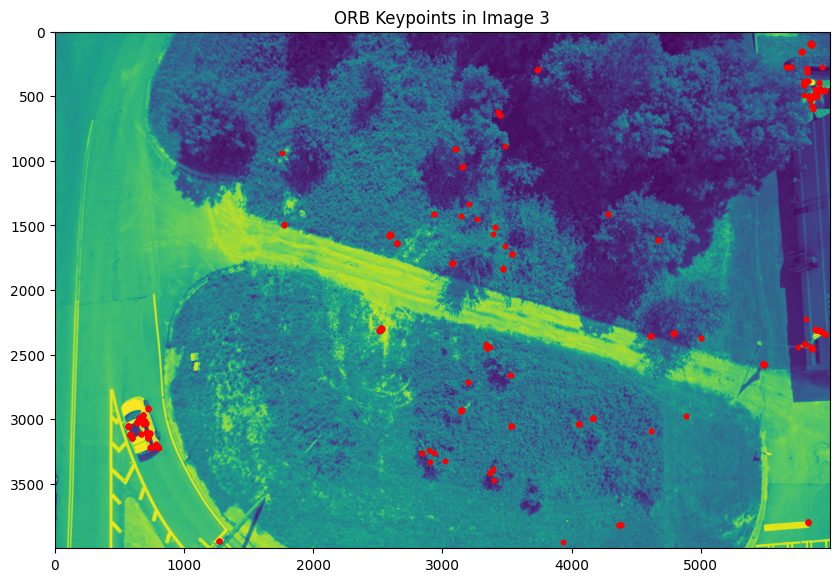

<Figure size 640x480 with 0 Axes>

In [59]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.figure()
ax.imshow(gi3)
ax.scatter([kp.pt[0] for kp in k3], [kp.pt[1] for kp in k3], color='r', s=10)
ax.set_title('ORB Keypoints in Image 3')
plt.show()

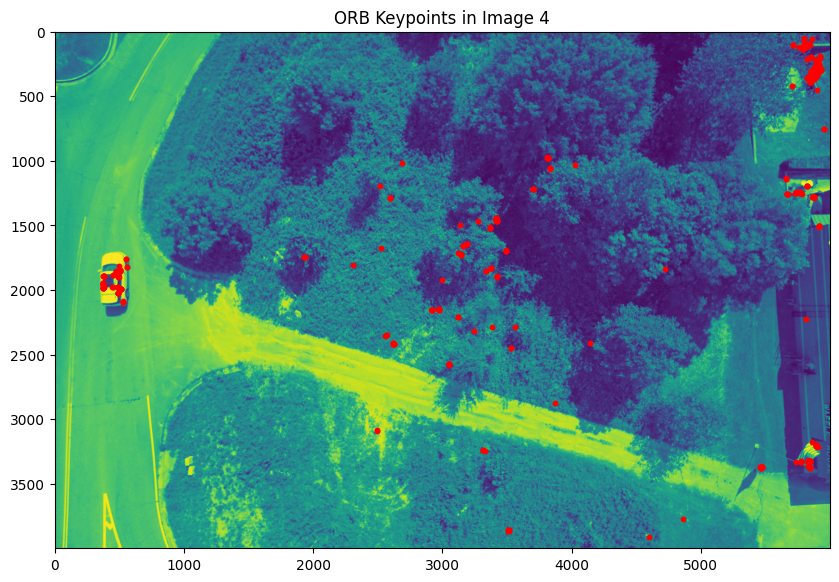

<Figure size 640x480 with 0 Axes>

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.figure()
ax.imshow(gi4)
ax.scatter([kp.pt[0] for kp in k4], [kp.pt[1] for kp in k4], color='r', s=10)
ax.set_title('ORB Keypoints in Image 4')
plt.show()

In [51]:
#brute force matcher
bf1 = bf.match(d1,d2)
bf2 = bf.match(d2,d3)
bf3 = bf.match(d3,d4)


m1 = sorted(bf1, key=lambda x: x.distance)
m2 = sorted(bf2, key=lambda x: x.distance)
m3 = sorted(bf3, key=lambda x: x.distance)

xp1 = [kp.pt[0] for kp in k1]
yp1 = [kp.pt[1] for kp in k1]

xp2 = [kp.pt[0] for kp in k2]
yp2 = [kp.pt[1] for kp in k2]

xp3 = [kp.pt[0] for kp in k3]
yp3 = [kp.pt[1] for kp in k3]

xp4 = [kp.pt[0] for kp in k4]
yp4 = [kp.pt[1] for kp in k1]

In [52]:
ci1 = np.concatenate((im1, im2), axis=1)
ci2 = np.concatenate((im2, im3), axis=1)
ci3 = np.concatenate((im3, im4), axis=1)

xp2s = [x + im1.shape[1] for x in xp2]
xp3s = [x + im2.shape[1] for x in xp3]
xp4s = [x + im3.shape[1] for x in xp4]

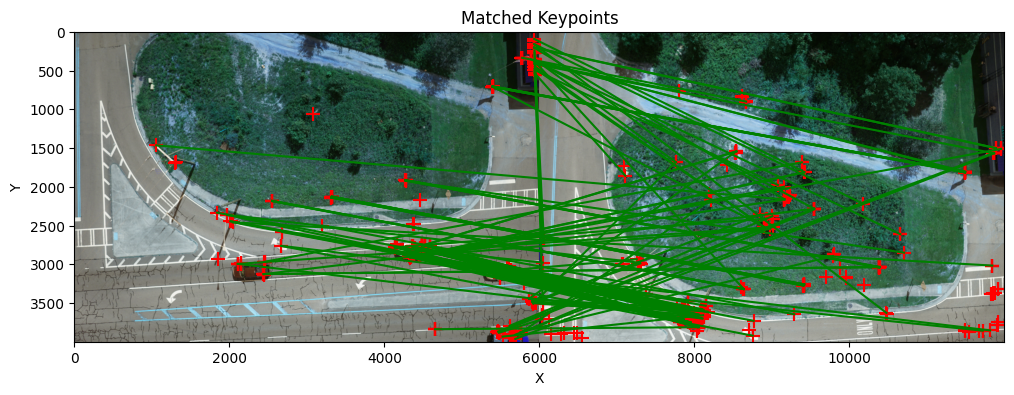

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.imshow(ci1)

for match in m1:
    # Get the keypoint indices from the match
    query_idx = match.queryIdx
    train_idx = match.trainIdx

    # Plot a line between the matched keypoints
    ax.plot([xp1[query_idx], xp2s[train_idx]], [yp1[query_idx], yp2[train_idx]], c='g')


ax.scatter(xp1, yp1, c='r', s=100, marker='+')
ax.scatter(xp2s, yp2, c='r', s=100, marker='+')

# Add title and axis labels
ax.set_title('Matched Keypoints')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Show the plot
plt.show()

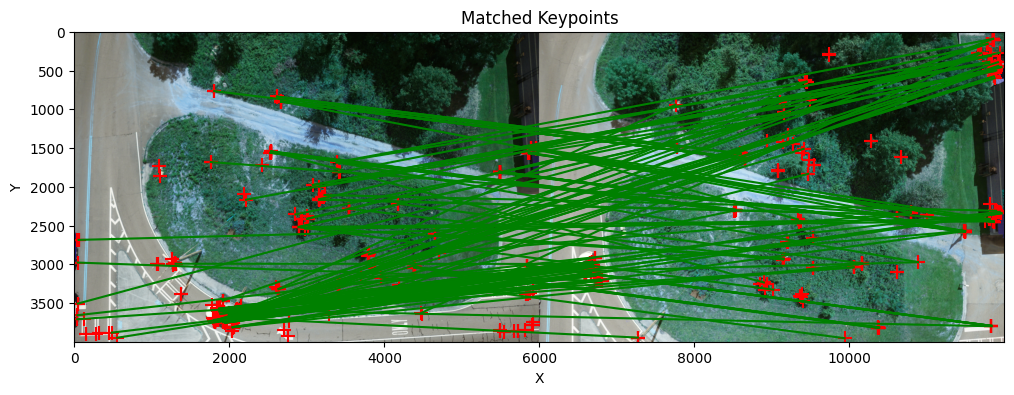

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.imshow(ci2)

for match in m2:
    # Get the keypoint indices from the match
    query_idx = match.queryIdx
    train_idx = match.trainIdx

    # Plot a line between the matched keypoints
    ax.plot([xp2[query_idx], xp3s[train_idx]], [yp2[query_idx], yp3[train_idx]], c='g')


ax.scatter(xp2, yp2, c='r', s=100, marker='+')
ax.scatter(xp3s, yp3, c='r', s=100, marker='+')

# Add title and axis labels
ax.set_title('Matched Keypoints')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Show the plot
plt.show()

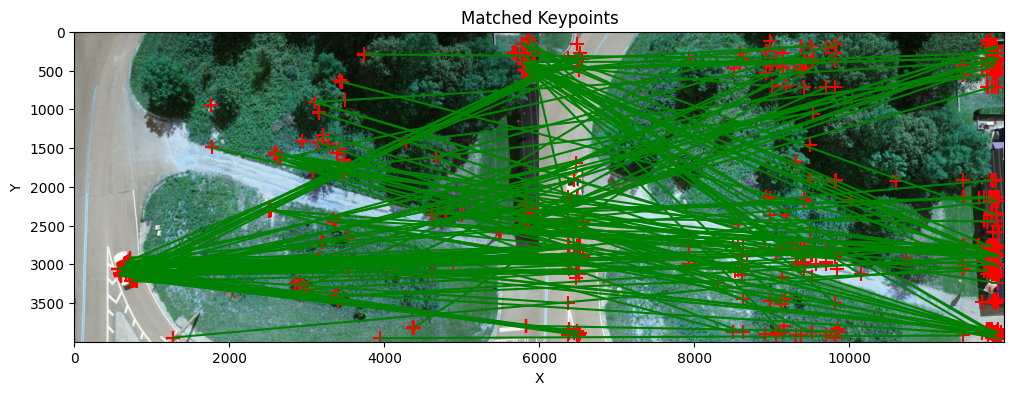

In [55]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.imshow(ci3)

for match in m3:
    # Get the keypoint indices from the match
    query_idx = match.queryIdx
    train_idx = match.trainIdx

    # Plot a line between the matched keypoints
    ax.plot([xp3[query_idx], xp4s[train_idx]], [yp3[query_idx], yp4[train_idx]], c='g')


ax.scatter(xp3, yp3, c='r', s=100, marker='+')
ax.scatter(xp4s, yp4, c='r', s=100, marker='+')

# Add title and axis labels
ax.set_title('Matched Keypoints')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Show the plot
plt.show()

In [56]:
p1 = np.array(list(zip(xp1, yp1)), dtype=np.float32)
p2 = np.array(list(zip(xp2, yp2)), dtype=np.float32)
p3 = np.array(list(zip(xp3, yp3)), dtype=np.float32)
p4 = np.array(list(zip(xp4, yp4)), dtype=np.float32)


E, mask = cv2.findEssentialMat(p1, p2, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)
_, R1, t1, mask = cv2.recoverPose(E, p1, p2, K)

E, mask = cv2.findEssentialMat(p2, p3, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)
_, R2, t2, mask = cv2.recoverPose(E, p2, p3, K)

E, mask = cv2.findEssentialMat(p3, p4, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)
_, R3, t3, mask = cv2.recoverPose(E, p3, p4, K)

Relative Trajectory (x, y, z):
Pose 0: [0. 0. 0.]
Pose 1: [ 0.21381341 -0.36704512 -0.90529647]
Pose 2: [-1.02489267  0.48266523  1.64730095]
Pose 3: [-1.64708417  0.28097499  0.77618879]


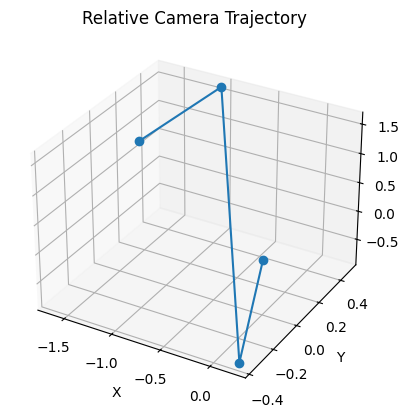

In [57]:
R_total = np.eye(3)
t_total = np.zeros((3, 1))
trajectory = [t_total.flatten()]

R_list = [R1, R2, R3]  
t_list = [t1, t2, t3] 

for R, t in zip(R_list, t_list):
    # Update the total rotation by multiplying with the current rotation
    R_total = R @ R_total
    
    # Update the total translation: apply the current rotation to the previous translation
    t_total = R @ t_total + t
    
    # Store the current position
    trajectory.append(t_total.flatten())

# Convert the trajectory list to a numpy array for easier manipulation
trajectory = np.array(trajectory)

# Print out the trajectory
print("Relative Trajectory (x, y, z):")
for i, position in enumerate(trajectory):
    print(f"Pose {i}: {position}")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Relative Camera Trajectory')
plt.show()